# **Customer churn prediction for SyriaTel using Machine learning**
### Churn analysis and classification modeling using SyraiTel Customer Churn dataset last updated 8 years ago on Kaggle.
### Goals
- **1. To Determine whether state is a factor affecting churning.**
- **2. To find out which state has the highest churn.**
- **3. To determine whether new customers churn faster than long-term customers.**
- **4. To determine which feature strongly drives churning.**
- **5. To determine the best-performing machine learning model for predicting SyriaTel telecom customer churn.**

## The metrics used for classification model performance is Receiver Operating Characteristic curves(ROC) and Area Under the Curve(AUC) and expect a AUC of 85% for the optimal decision tree.

In [1]:
# importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
sns.set_style('darkgrid', {'axes.facecolor':'0.9'})
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc

In [2]:
# Loading data.
data=pd.read_csv("./data/Telecom's data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Checking for null values.
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
# Checking duplicates.
data.duplicated().sum()

0

In [6]:
# Checking for continuous and categorical data.
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [7]:
data.drop(columns=["total day charge",  "total eve charge", "total night charge", "total intl charge"], axis=1, inplace=True)

### We remove the charges to avoid multicollinearity.

#### We have four categorical features in our dataset state, voice mail plan, internation plan and churn these four will be used for analysis and modelling including total calls, total minutes, total charge, customer service calls, account length and number of voice mail messages.

## 1. Does state have an association with the churning of a customer?

### H<sub>0</sub>: Churn is independent of state Vs H<sub>1</sub>: There is an association between churn and state at 1% level of significance.

In [8]:
# chisquare test for churns of different states.
contingency_table=pd.crosstab(data.state, data.churn)
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f'p-value: {p}')

p-value: 0.002296221552011188


### There is an association between between churn and different states.

### 2. Which states have the highest churn rate?

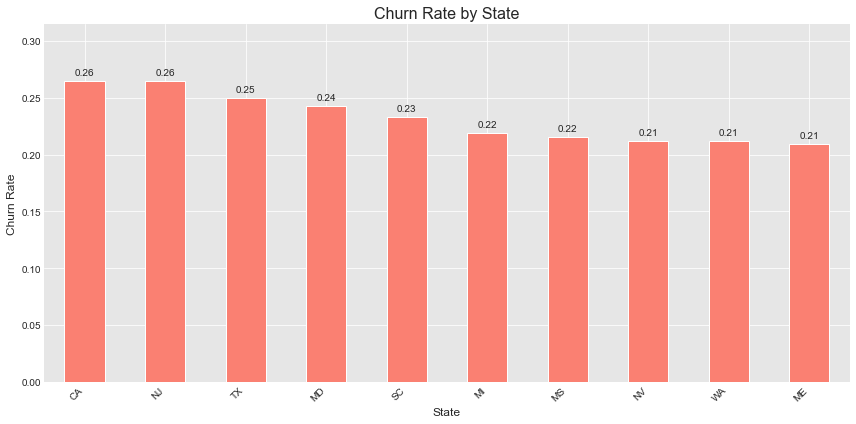

In [9]:
# Grouping churn by state.
data['churn']=data['churn'].astype(int)
churn_by_state = data.groupby('state')['churn'].mean().sort_values(ascending=False).head(10)
# Top 10 states with high churn rate.
plt.figure(figsize=(12,6))
churn_by_state.plot(kind='bar', color='salmon')
plt.title('Churn Rate by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, churn_by_state.max() + 0.05)
for i, rate in enumerate(churn_by_state):
    plt.text(i, rate + 0.005, f"{rate:.2f}", ha='center', fontsize=10)
plt.tight_layout();

### Carlifornia and New Jersey are the states with the highest churn rate of 26%

### 3. Do new customers churn faster than old customers.

### H<sub>0</sub>: The mean account length of those who churned is equal to those who haven't Vs
### H<sub>1</sub>: The mean account length of those who churned differs from those who haven't at 1% level of significance.

In [10]:
# Summary statistics.
data['account length'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account length, dtype: float64

In [11]:
acc_length_churn=data[data['churn']==1]['account length']
acc_length_nochurn=data[data['churn']==0]['account length']

In [12]:
# ttest for independence.
t_stat, p_val = stats.ttest_ind(acc_length_churn, acc_length_nochurn)
print(f'p_value: {p_val}')

p_value: 0.3397600070563822


### The mean account length of those who churn and those who didn't do not differ.

In [13]:
# Threshold for new customers 12 months.
data['is_new']=(data['account length']<=12).astype(int)
data['is_new'].value_counts()

0    3299
1      34
Name: is_new, dtype: int64

In [14]:
# grouping churn by is_new column.
churn_rates=data.groupby('is_new')['churn'].mean()
churn_rates

is_new
0    0.145499
1    0.088235
Name: churn, dtype: float64

#### In our dataset 8.82% of new customers churned, compared to 14.55% of long term customers.

#### To the contrary, old customers seem to churn faster than new customers.

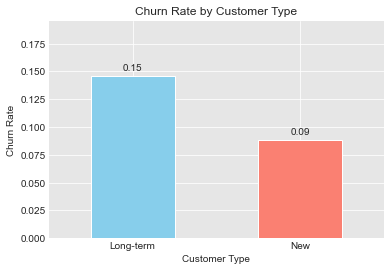

In [15]:
# Bar plot of churn rate between new and old customers.
churn_rates.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Churn Rate')
plt.xticks(ticks=[0,1], labels=['Long-term', 'New'], rotation=0)
plt.ylim(0, churn_rates.max() + 0.05)
for i, rate in enumerate(churn_rates):
    plt.text(i, rate + 0.005, f"{rate:.2f}", ha='center', fontsize=10);

### Modeling process.

## Goals 4 and 5.

In [16]:
# Tareget and feature selection.
y=data.churn
X=data.drop(columns=['area code', 'phone number', 'churn', 'is_new'], axis=1)

In [17]:
# Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# Data types selection.
X_train_cat=X_train.select_dtypes(exclude=['int64','float64']).copy()
X_train_num=X_train.select_dtypes(include=['int64','float64']).copy()

In [19]:
ohe = OneHotEncoder(sparse=False, drop='first')
X_train_ohe_array = ohe.fit_transform(X_train_cat)

# Get column names correctly after dropping first category
column_names = []
for i, cats in enumerate(ohe.categories_):
    # skip first category because it is dropped
    column_names.extend([f"{X_train_cat.columns[i]}_{cat}" for cat in cats[1:]])

# Create DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe_array, index=X_train_cat.index, columns=column_names)
X_train_ohe.head()


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Standard scaling.
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)
X_train_scaled.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
367,-1.404508,-0.584700,-1.883677,1.330852,1.037727,0.401340,1.069609,0.004940,2.768109,-0.595235,-0.427903
3103,0.366388,-0.584700,0.294083,0.529165,0.516178,0.401340,2.214376,0.670832,1.051970,-1.417963,0.324616
549,0.518179,1.685101,1.056392,-1.875896,0.093407,0.849774,-0.077125,-0.763398,-0.056369,0.227493,1.829653
2531,2.010792,-0.584700,-0.679156,1.681590,-0.402459,0.650470,-0.322994,-0.660953,-0.056369,-0.183871,-0.427903
2378,0.290493,-0.584700,0.484660,1.080325,-0.718549,-0.296224,-1.186487,0.056162,0.837453,1.050221,1.077134


In [21]:
# Merging columns.
X_train_full=pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
367,-1.404508,-0.584700,-1.883677,1.330852,1.037727,0.401340,1.069609,0.004940,2.768109,-0.595235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3103,0.366388,-0.584700,0.294083,0.529165,0.516178,0.401340,2.214376,0.670832,1.051970,-1.417963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,0.518179,1.685101,1.056392,-1.875896,0.093407,0.849774,-0.077125,-0.763398,-0.056369,0.227493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2531,2.010792,-0.584700,-0.679156,1.681590,-0.402459,0.650470,-0.322994,-0.660953,-0.056369,-0.183871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2378,0.290493,-0.584700,0.484660,1.080325,-0.718549,-0.296224,-1.186487,0.056162,0.837453,1.050221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Data types selection.
X_test_cat=X_test.select_dtypes(exclude=['int64','float64']).copy()
X_test_num=X_test.select_dtypes(include=['int64','float64']).copy()

In [23]:
# one hot encoding.
X_test_ohe=pd.DataFrame(ohe.transform(X_test_cat), index=X_test_cat.index, columns=column_names)
X_test_ohe.head()

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Standard Scaling.
X_test_scaled=pd.DataFrame(scaler.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)
X_test_scaled.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
438,0.315791,-0.5847,-0.462675,-0.372733,2.562862,0.301688,-0.220713,1.183057,1.159229,-0.595235,-0.427903
2674,-0.847941,-0.5847,-1.311946,0.829797,0.326524,1.198556,-0.240382,2.105062,0.908959,0.638857,-1.180421
1345,-0.063687,-0.5847,-3.330584,-5.032539,-0.815352,1.497512,-0.659343,-0.609730,-1.236214,-1.417963,1.829653
1957,1.175941,-0.5847,0.606778,-1.074209,0.063774,-0.445702,-0.873741,0.670832,-0.020616,-1.006599,-0.427903
2148,-0.114284,-0.5847,-0.666204,0.078216,0.470740,-1.342571,0.532630,-0.456063,-0.092122,1.050221,-0.427903


In [25]:
# Merging columns.
X_test_full=pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
438,0.315791,-0.5847,-0.462675,-0.372733,2.562862,0.301688,-0.220713,1.183057,1.159229,-0.595235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2674,-0.847941,-0.5847,-1.311946,0.829797,0.326524,1.198556,-0.240382,2.105062,0.908959,0.638857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,-0.063687,-0.5847,-3.330584,-5.032539,-0.815352,1.497512,-0.659343,-0.609730,-1.236214,-1.417963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957,1.175941,-0.5847,0.606778,-1.074209,0.063774,-0.445702,-0.873741,0.670832,-0.020616,-1.006599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2148,-0.114284,-0.5847,-0.666204,0.078216,0.470740,-1.342571,0.532630,-0.456063,-0.092122,1.050221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
# Creating first logistic/ baseline model and testing accuracy.
logreg=LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', class_weight='balanced')
logreg.fit(X_train_full,y_train)
y_h_train=logreg.predict(X_train_full)
y_h_test=logreg.predict(X_test_full)
fpr, tpr, thresholds=roc_curve(y_train, y_h_train)
fpr2, tpr2, threholds2=roc_curve(y_test, y_h_test)
print(f'train auc score: {auc(fpr, tpr)}')
print(f'test auc score: {auc(fpr2, tpr2)}')

train auc score: 0.7708133827715865
test auc score: 0.786691114245416


In [27]:
coef_dict = dict(zip(X_train_full.columns, logreg.coef_[0]))
coef_dict

{'account length': 0.04883832752302597,
 'number vmail messages': 0.43718074129303747,
 'total day minutes': 0.6492760533888592,
 'total day calls': 0.04204355842324494,
 'total eve minutes': 0.3437860051134078,
 'total eve calls': 0.0014433047422496058,
 'total night minutes': 0.17121315135830434,
 'total night calls': -0.017014432819777197,
 'total intl minutes': 0.1983042250808856,
 'total intl calls': -0.12618575865672382,
 'customer service calls': 0.781914901727545,
 'state_AL': -1.5068760344465337,
 'state_AR': -0.1993436595918144,
 'state_AZ': -1.0815413162489464,
 'state_CA': 0.8003481886928779,
 'state_CO': -0.5933654703731881,
 'state_CT': -0.5094453177782922,
 'state_DC': -0.13018052758878124,
 'state_DE': -0.5643115538354057,
 'state_FL': -0.32867365626323897,
 'state_GA': -0.06854876006146339,
 'state_HI': -1.29031519424368,
 'state_IA': -1.6271779880108161,
 'state_ID': -0.6298010300267284,
 'state_IL': -1.2777502753721668,
 'state_IN': -0.2839180002694059,
 'state_KS': 

In [28]:
sorted_coef = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_coef

[('international plan_yes', 2.546096413920258),
 ('voice mail plan_yes', -1.8300087153680384),
 ('state_IA', -1.6271779880108161),
 ('state_ND', -1.5163007048058734),
 ('state_AL', -1.5068760344465337),
 ('state_VT', -1.3844464926433766),
 ('state_HI', -1.29031519424368),
 ('state_IL', -1.2777502753721668),
 ('state_VA', -1.2656800651796791),
 ('state_AZ', -1.0815413162489464),
 ('state_TN', -0.8982145783150535),
 ('state_MO', -0.8631768197250453),
 ('state_CA', 0.8003481886928779),
 ('state_MT', 0.7850253449537897),
 ('customer service calls', 0.781914901727545),
 ('state_RI', -0.7587743492050064),
 ('state_WY', -0.6838026607365117),
 ('state_WI', -0.6687830377319451),
 ('total day minutes', 0.6492760533888592),
 ('state_SD', -0.6337941762155054),
 ('state_ID', -0.6298010300267284),
 ('state_CO', -0.5933654703731881),
 ('state_NM', -0.5806040847292041),
 ('state_NH', -0.5721947601060419),
 ('state_DE', -0.5643115538354057),
 ('state_MS', 0.532438284940978),
 ('state_CT', -0.5094453177

In [29]:
np.exp(2.546096413920258)

12.757207600995066

### The strongest driver of churning is if a customer has an international plan. A customer with this plan is 12.76 times highly likely to churn compared to a customer without.